## TKTS Sales Data Analysis

In [128]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



Populating the interactive namespace from numpy and matplotlib


In [129]:
#Get TKTS Sales
#This file contains sales per week, split into the four booths for the year 2016
#Note: Linc booth did not open until late 2016
tktsSales = pd.DataFrame.from_csv('data/private/tktssalescombined.csv',index_col=None)
tktsSales['SaleDate'] = pd.to_datetime(tktsSales['SaleDate'])
tktsSales['TKTSPercent'] = tktsSales.BwayOnlyTotal / tktsSales.VarietyTotal * 100
tktsSales['Linc'] = tktsSales.Linc.fillna(0)
tktsSales = tktsSales.set_index('WeekNum')
tktsSales.head()

,SaleDate,TiSq,SSSP,Bkln,Linc,Total,BwayOnlyTotal,VarietyTotal,TKTSPercent
WeekNum,,,,,,,,,
1,2016-01-10,21099,2789,1022,0,24910,23116,259698,8.901108
2,2016-01-17,19945,2920,1036,0,23901,21867,257867,8.479953
3,2016-01-24,11920,1200,297,0,13417,12484,174717,7.145269
4,2016-01-31,15005,1799,653,0,17457,15796,247475,6.382867
5,2016-02-07,15135,1565,626,0,17326,16042,226001,7.098199


In [130]:
#Get The Running Tally of Shows Open During the Year
openBroadwayShows = pd.DataFrame.from_csv('data/BroadwayShowsRunningTally.csv',index_col=None)
openBroadwayShows = openBroadwayShows.drop([0,1,54])
openBroadwayShows = openBroadwayShows.set_index('WeekNum')
#openBroadwayShows = openBroadwayShows.reset_index()
openBroadwayShows.head()

,NumofRunningShows,NumOpened,NumClosed,Opened,Closed
WeekNum,,,,,
1,33,0.0,1.0,NaN,The Gin Game
2,32,0.0,1.0,NaN,Gentleman's Guide
3,32,1.0,1.0,The Humans,Spring Awakening
4,31,0.0,2.0,NaN,"King Charles, China Doll"
5,30,1.0,0.0,Blackbird,NaN


In [131]:
# Get The Shows On Sale At The Booth
soldBroadwayShows = pd.DataFrame.from_csv('data/private/TKTSShowsOnSale2016.csv',index_col=None)
#soldBroadwayShows = soldBroadwayShows.groupby('SaleDate').ShowID.size()
soldBroadwayShows['SaleDate'] = pd.to_datetime(soldBroadwayShows['SaleDate'])
soldBroadwayShows['WeekNum'] = soldBroadwayShows.SaleDate.dt.weekofyear
soldBroadwayShows = soldBroadwayShows.groupby('WeekNum').ShowID.nunique()
soldBroadwayShows = pd.DataFrame(soldBroadwayShows)
#soldBroadwayShows = soldBroadwayShows.reset_index()
soldBroadwayShows.head()

,ShowID
WeekNum,
1,28
2,28
3,26
4,25
5,24


In [150]:
#Combine all to one Dataframe
tktsSales['ShowsRunning'] = openBroadwayShows.NumofRunningShows
tktsSales['ShowsSold'] = soldBroadwayShows.ShowID
tktsSales = tktsSales.reset_index()
tktsSales.head()

,index,WeekNum,SaleDate,TiSq,SSSP,Bkln,Linc,Total,BwayOnlyTotal,VarietyTotal,TKTSPercent,ShowsRunning,ShowsSold
0,0,1,2016-01-10,21099,2789,1022,0,24910,23116,259698,8.901108,NaN,NaN
1,1,2,2016-01-17,19945,2920,1036,0,23901,21867,257867,8.479953,33.0,28.0
2,2,3,2016-01-24,11920,1200,297,0,13417,12484,174717,7.145269,32.0,28.0
3,3,4,2016-01-31,15005,1799,653,0,17457,15796,247475,6.382867,32.0,26.0
4,4,5,2016-02-07,15135,1565,626,0,17326,16042,226001,7.098199,31.0,25.0


In [133]:
#Get TKTS Sales From Previous Years
#We only need the total 

#This file contains sales per week, split into the four booths for the year 2016
#Note: Hurricane Sandy rendered the South Street Seaport booth inoperable in Oct 2012.
#      It returned to operation in July 2013
tktsSales2013 = pd.DataFrame.from_csv('data/private/tktssales2013.csv',index_col=None)
tktsSales2013['SaleDate'] = pd.to_datetime(tktsSales2013['SaleDate'])
#tktsSales2013 = tktsSales2013.set_index('WeekNum')

tktsSales2014 = pd.DataFrame.from_csv('data/private/tktssales2014.csv',index_col=None)
tktsSales2014['SaleDate'] = pd.to_datetime(tktsSales2014['SaleDate'])
#tktsSales2014 = tktsSales2014.set_index('WeekNum')

tktsSales2015 = pd.DataFrame.from_csv('data/private/tktssales2015.csv',index_col=None)
tktsSales2015['SaleDate'] = pd.to_datetime(tktsSales2015['SaleDate'])
#tktsSales2015 = tktsSales2015.set_index('WeekNum')

tktsSales2013.head()

,WeekNum,SaleDate,TiSq,SSSP,Bkln,Linc,Total
0,1,2013-01-06,30645,NaN,2004,NaN,32649
1,2,2013-01-13,24837,NaN,1307,NaN,26144
2,3,2013-01-20,23593,NaN,1467,NaN,25060
3,4,2013-01-27,18114,NaN,916,NaN,19030
4,5,2013-02-03,17693,NaN,776,NaN,18469


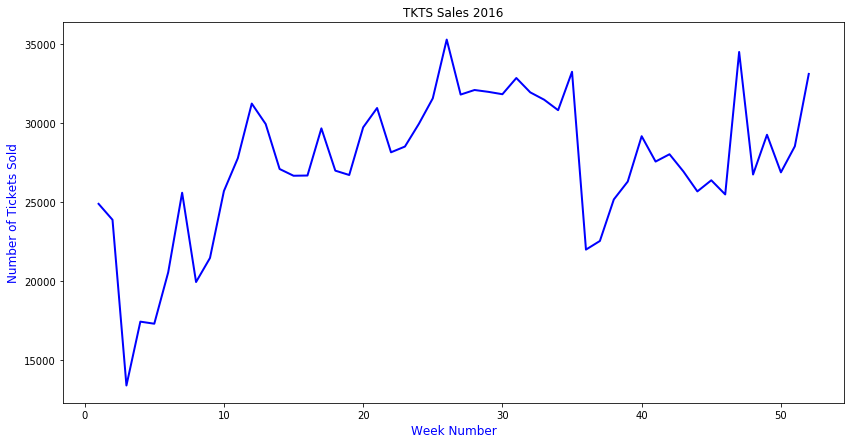

In [134]:
x = tktsSales.WeekNum
y = tktsSales.Total
fig,ax1 = plt.subplots(figsize=(14,7))
plt.title("TKTS Sales 2016")
ax1.plot(x,y,lw=2,color='blue')
ax1.set_xlabel(r"Week Number",fontsize=12,color='blue')
ax1.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')

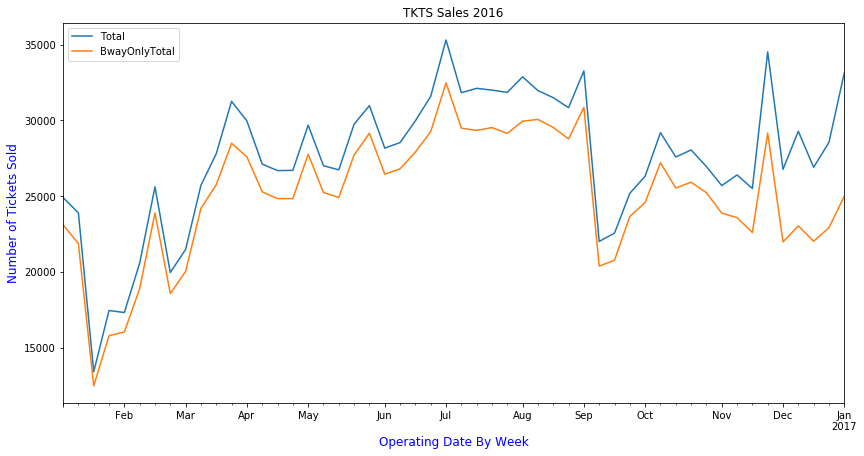

In [164]:
ax2016 = tktsSales.plot(x='SaleDate', y='Total',figsize=(14,7),title="TKTS Sales 2016", grid=True)
ax2016b = tktsSales.plot(x='SaleDate', y='BwayOnlyTotal',ax=ax2016)
ax2016.set_xlabel(r"Operating Date By Week",fontsize=12,color='blue')
ax2016.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')

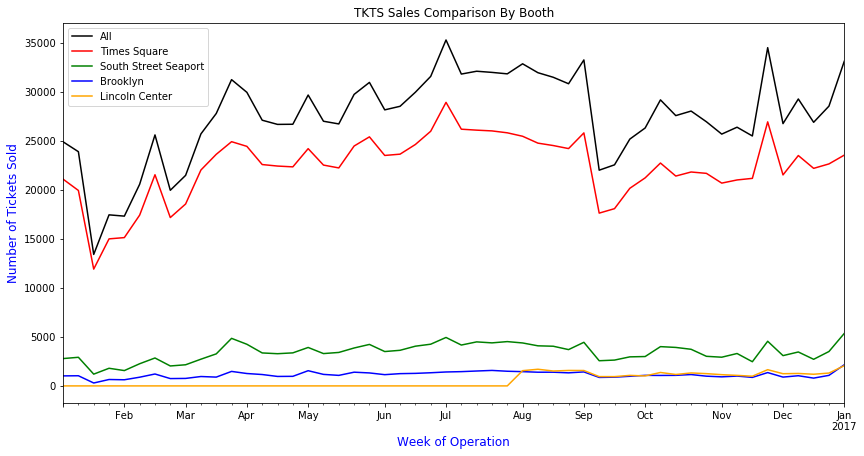

In [168]:
sALL = tktsSales.plot(x='SaleDate', y='Total', color='Black', label='All',figsize=(14,7),title="TKTS Sales Comparison By Booth")
sTiSq = tktsSales.plot(x='SaleDate', y='TiSq', color='Red', label='Times Square',ax=sALL)
sSSSP = tktsSales.plot(x='SaleDate', y='SSSP', color='Green', label='South Street Seaport',ax=sALL)
sBkln = tktsSales.plot(x='SaleDate', y='Bkln', color='Blue', label='Brooklyn',ax=sALL)
sLinc = tktsSales.plot(x='SaleDate', y='Linc', color='Orange', label='Lincoln Center',ax=sALL)

sALL.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
sALL.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')

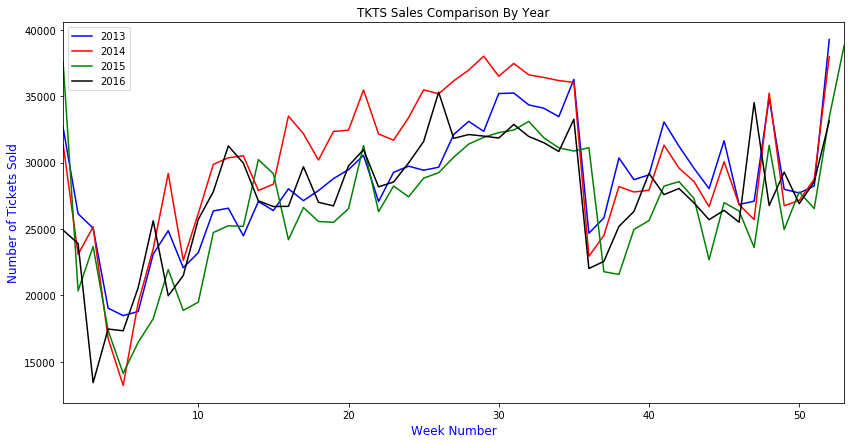

In [136]:
s2013 = tktsSales2013.plot(x='WeekNum', y='Total', color='Blue', label='2013',figsize=(14,7),title="TKTS Sales Comparison By Year")
s2014 = tktsSales2014.plot(x='WeekNum', y='Total', color='Red', label='2014',ax=s2013)
s2015 = tktsSales2015.plot(x='WeekNum', y='Total', color='Green', label='2015',ax=s2014)
s2016 = tktsSales.plot(x='WeekNum', y='Total', color='Black', label='2016',ax=s2015)

s2013.set_xlabel(r"Week Number",fontsize=12,color='blue')
s2013.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')

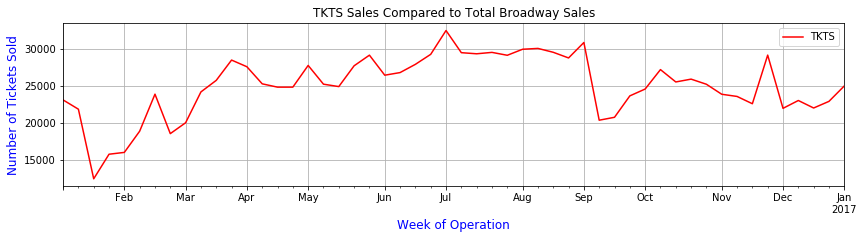

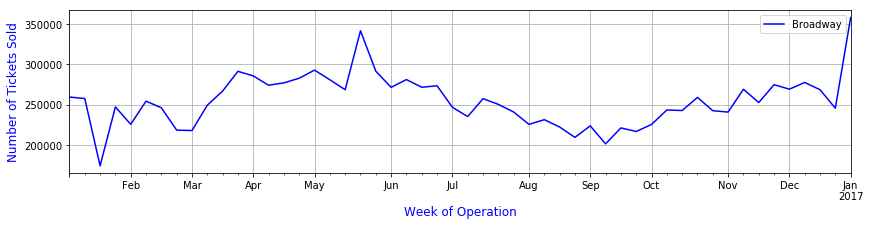

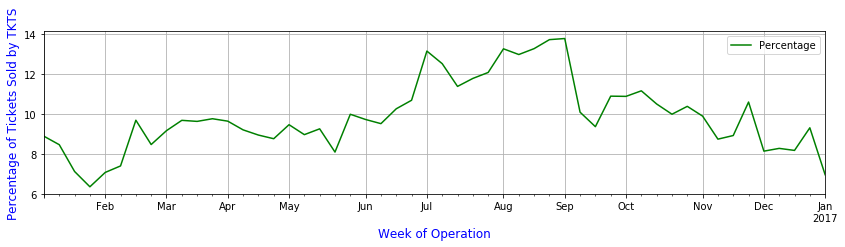

In [165]:
sBwayOnly = tktsSales.plot(x='SaleDate', y='BwayOnlyTotal', color='Red', label='TKTS',figsize=(14,3),title="TKTS Sales Compared to Total Broadway Sales", grid=True)
sVariety = tktsSales.plot(x='SaleDate', y='VarietyTotal', color='Blue', label='Broadway',figsize=(14,3), grid=True)
sTKTSPercent = tktsSales.plot(x='SaleDate', y='TKTSPercent', color='Green', label='Percentage',figsize=(14,3), grid=True)
sBwayOnly.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
sBwayOnly.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')
sVariety.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
sVariety.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')
sTKTSPercent.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
sTKTSPercent.set_ylabel(r"Percentage of Tickets Sold by TKTS",fontsize=12,color='blue')

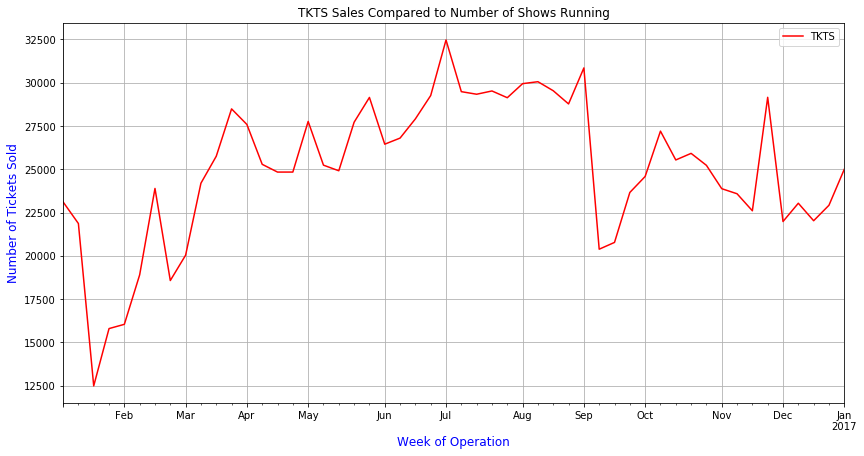

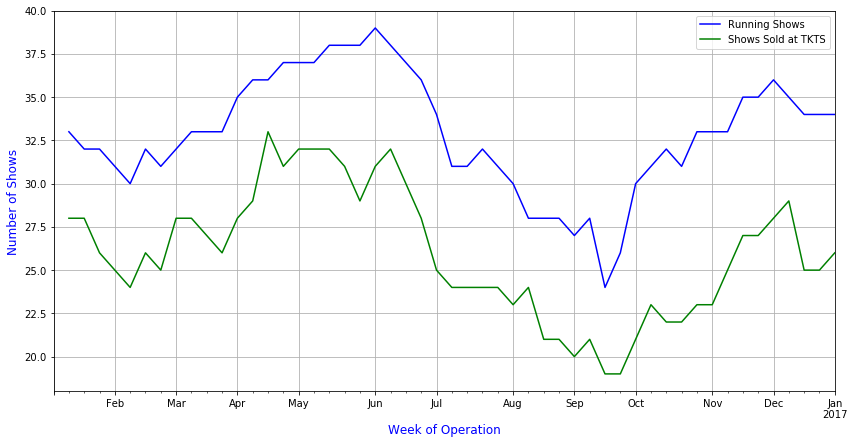

In [163]:
sTotals = tktsSales.plot(x='SaleDate', y='BwayOnlyTotal', color='Red', label='TKTS',figsize=(14,7),title="TKTS Sales Compared to Number of Shows Running", grid=True)
sShowsRunning = tktsSales.plot(x='SaleDate', y='ShowsRunning', color='Blue', label='Running Shows',figsize=(14,7), grid=True)
sShowsSold = tktsSales.plot(x='SaleDate', y='ShowsSold', color='Green', label='Shows Sold at TKTS',ax=sShowsRunning, grid=True)

sTotals.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
sTotals.set_ylabel(r"Number of Tickets Sold",fontsize=12,color='blue')
sShowsRunning.set_xlabel(r"Week of Operation",fontsize=12,color='blue')
sShowsRunning.set_ylabel(r"Number of Shows",fontsize=12,color='blue')